<a href="https://colab.research.google.com/github/Trillanest/Challenge_TelecomX-/blob/main/Challenge_TelecomX_Alura.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Cargar datos desde la API y convirtiendo datos a un DataFrame**


In [274]:
import requests
import pandas as pd

url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json"

respuesta = requests.get(url)
datos_json = respuesta.json()

df = pd.json_normalize(datos_json)

df.head()


,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


# **Exploración de columnas, tipos de datos, consulta de diccionarios e identificación de columnas relevantes para el análisis de evasión.**



In [275]:
import requests

url_diccionario = "https://raw.githubusercontent.com/alura-cursos/challenge2-data-science-LATAM/refs/heads/main/TelecomX_diccionario.md"

respuesta_diccionario = requests.get(url_diccionario)

contenido_diccionario = respuesta_diccionario.text
print(contenido_diccionario)

#### Diccionario de datos

- `customerID`: número de identificación único de cada cliente
- `Churn`: si el cliente dejó o no la empresa
- `gender`: género (masculino y femenino)
- `SeniorCitizen`: información sobre si un cliente tiene o no una edad igual o mayor a 65 años
- `Partner`: si el cliente tiene o no una pareja
- `Dependents`: si el cliente tiene o no dependientes
- `tenure`: meses de contrato del cliente
- `PhoneService`: suscripción al servicio telefónico
- `MultipleLines`: suscripción a más de una línea telefónica
- `InternetService`: suscripción a un proveedor de internet
- `OnlineSecurity`: suscripción adicional de seguridad en línea
- `OnlineBackup`: suscripción adicional de respaldo en línea
- `DeviceProtection`: suscripción adicional de protección del dispositivo
- `TechSupport`: suscripción adicional de soporte técnico, menor tiempo de espera
- `StreamingTV`: suscripción de televisión por cable
- `StreamingMovies`: suscripción de streaming de películas
- `Contract`: t

In [276]:
print("Columnas del DataFrame:")
print(df.columns)

print("\nInformación del DataFrame:")
df.info()

print("\nTipos de datos por columna:")
print(df.dtypes)

Columnas del DataFrame:
Index(['customerID', 'Churn', 'customer.gender', 'customer.SeniorCitizen',
       'customer.Partner', 'customer.Dependents', 'customer.tenure',
       'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService',
       'internet.OnlineSecurity', 'internet.OnlineBackup',
       'internet.DeviceProtection', 'internet.TechSupport',
       'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract',
       'account.PaperlessBilling', 'account.PaymentMethod',
       'account.Charges.Monthly', 'account.Charges.Total'],
      dtype='object')

Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   objec

In [277]:
print(contenido_diccionario[:2000])

#### Diccionario de datos

- `customerID`: número de identificación único de cada cliente
- `Churn`: si el cliente dejó o no la empresa
- `gender`: género (masculino y femenino)
- `SeniorCitizen`: información sobre si un cliente tiene o no una edad igual o mayor a 65 años
- `Partner`: si el cliente tiene o no una pareja
- `Dependents`: si el cliente tiene o no dependientes
- `tenure`: meses de contrato del cliente
- `PhoneService`: suscripción al servicio telefónico
- `MultipleLines`: suscripción a más de una línea telefónica
- `InternetService`: suscripción a un proveedor de internet
- `OnlineSecurity`: suscripción adicional de seguridad en línea
- `OnlineBackup`: suscripción adicional de respaldo en línea
- `DeviceProtection`: suscripción adicional de protección del dispositivo
- `TechSupport`: suscripción adicional de soporte técnico, menor tiempo de espera
- `StreamingTV`: suscripción de televisión por cable
- `StreamingMovies`: suscripción de streaming de películas
- `Contract`: t

In [278]:
df['Churn'].value_counts()

,count
Churn,
No,5174
Yes,1869
,224


In [279]:
df['Churn'].value_counts(normalize=True) * 100

,proportion
Churn,
No,71.198569
Yes,25.719004
,3.082427


In [280]:
df['Churn'].unique()

array(['No', 'Yes', ''], dtype=object)

In [281]:
df['Churn'].value_counts(dropna=False)

,count
Churn,
No,5174
Yes,1869
,224


In [282]:
df[df['Churn'].isnull() | (df['Churn'].str.strip() == '')]

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
30,0047-ZHDTW,,Female,0,No,No,11,Yes,Yes,Fiber optic,...,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),79.00,929.3
75,0120-YZLQA,,Male,0,No,No,71,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic),19.90,1355.1
96,0154-QYHJU,,Male,0,No,No,29,Yes,No,DSL,...,Yes,No,Yes,No,No,One year,Yes,Electronic check,58.75,1696.2
98,0162-RZGMZ,,Female,1,No,No,5,Yes,No,DSL,...,Yes,No,Yes,No,No,Month-to-month,No,Credit card (automatic),59.90,287.85
175,0274-VVQOQ,,Male,1,Yes,No,65,Yes,Yes,Fiber optic,...,Yes,Yes,No,Yes,Yes,One year,Yes,Bank transfer (automatic),103.15,6792.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7158,9840-GSRFX,,Female,0,No,No,14,Yes,Yes,DSL,...,Yes,No,No,No,No,One year,Yes,Mailed check,54.25,773.2
7180,9872-RZQQB,,Female,0,Yes,No,49,No,No phone service,DSL,...,No,No,No,Yes,No,Month-to-month,No,Bank transfer (automatic),40.65,2070.75
7211,9920-GNDMB,,Male,0,No,No,9,Yes,Yes,Fiber optic,...,No,No,No,No,No,Month-to-month,Yes,Electronic check,76.25,684.85
7239,9955-RVWSC,,Female,0,Yes,Yes,67,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),19.25,1372.9


In [283]:
df = df[df['Churn'].isin(['Yes', 'No'])].copy()

In [284]:
df['Churn'].value_counts(dropna=False)

,count
Churn,
No,5174
Yes,1869


# **Verificación de valores ausentes, duplicados, errores de formato e inconcistencias en categorías.**

In [285]:
df.isnull().sum()

,0
customerID,0
Churn,0
customer.gender,0
customer.SeniorCitizen,0
customer.Partner,0
customer.Dependents,0
customer.tenure,0
phone.PhoneService,0
phone.MultipleLines,0
internet.InternetService,0


In [286]:
df.duplicated().sum()

np.int64(0)

In [287]:
df.dtypes

,0
customerID,object
Churn,object
customer.gender,object
customer.SeniorCitizen,int64
customer.Partner,object
customer.Dependents,object
customer.tenure,int64
phone.PhoneService,object
phone.MultipleLines,object
internet.InternetService,object


In [288]:
df['account.Charges.Total'] = pd.to_numeric(df['account.Charges.Total'], errors='coerce')

In [289]:
df.dtypes

,0
customerID,object
Churn,object
customer.gender,object
customer.SeniorCitizen,int64
customer.Partner,object
customer.Dependents,object
customer.tenure,int64
phone.PhoneService,object
phone.MultipleLines,object
internet.InternetService,object


In [290]:
df['internet.InternetService'].unique()
df['account.Contract'].unique()
df['account.PaymentMethod'].unique()

array(['Mailed check', 'Electronic check', 'Credit card (automatic)',
       'Bank transfer (automatic)'], dtype=object)

In [291]:
for col in df.columns:
    if df[col].dtype == 'object':
        print(f'{col}: {df[col].unique()}')

customerID: ['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
Churn: ['No' 'Yes']
customer.gender: ['Female' 'Male']
customer.Partner: ['Yes' 'No']
customer.Dependents: ['Yes' 'No']
phone.PhoneService: ['Yes' 'No']
phone.MultipleLines: ['No' 'Yes' 'No phone service']
internet.InternetService: ['DSL' 'Fiber optic' 'No']
internet.OnlineSecurity: ['No' 'Yes' 'No internet service']
internet.OnlineBackup: ['Yes' 'No' 'No internet service']
internet.DeviceProtection: ['No' 'Yes' 'No internet service']
internet.TechSupport: ['Yes' 'No' 'No internet service']
internet.StreamingTV: ['Yes' 'No' 'No internet service']
internet.StreamingMovies: ['No' 'Yes' 'No internet service']
account.Contract: ['One year' 'Month-to-month' 'Two year']
account.PaperlessBilling: ['Yes' 'No']
account.PaymentMethod: ['Mailed check' 'Electronic check' 'Credit card (automatic)'
 'Bank transfer (automatic)']


In [292]:
df['customer.gender'] = df['customer.gender'].str.strip().str.lower()

In [293]:
import numpy as np
df['account.StartDate'] = pd.to_datetime(
    np.random.choice(pd.date_range('2022-01-01', '2023-12-31'), size=len(df))
)
df['account.StartDate'] = df['account.StartDate'].dt.normalize()

In [294]:
df['account.StartDate'].head()

,account.StartDate
0,2022-01-24
1,2022-05-16
2,2023-09-24
3,2022-03-15
4,2022-10-03


In [295]:
print(df['account.StartDate'])

0      2022-01-24
1      2022-05-16
2      2023-09-24
3      2022-03-15
4      2022-10-03
          ...    
7262   2023-02-16
7263   2022-06-19
7264   2022-11-29
7265   2022-06-14
7266   2023-10-21
Name: account.StartDate, Length: 7043, dtype: datetime64[ns]


In [296]:
df[['customerID', 'account.StartDate']].head()

,customerID,account.StartDate
0,0002-ORFBO,2022-01-24
1,0003-MKNFE,2022-05-16
2,0004-TLHLJ,2023-09-24
3,0011-IGKFF,2022-03-15
4,0013-EXCHZ,2022-10-03


In [297]:
df['account.StartDate'].dtypes

dtype('<M8[ns]')

# **Manejo de inconsistencias utilizando str.lower(), str.strip() y otras funciones**

In [298]:
df['customer.gender'] = df['customer.gender'].str.lower()

In [257]:
df['account.PaymentMethod'] = df['account.PaymentMethod'].str.lower().str.replace('electronic check', 'electronic check', regex=False)

In [258]:
df[df['account.PaymentMethod'].str.contains('check', case=False)]

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,account.StartDate
0,0002-ORFBO,No,female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,mailed check,65.60,593.30,2023-08-17
1,0003-MKNFE,No,male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,mailed check,59.90,542.40,2022-02-14
2,0004-TLHLJ,Yes,male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,electronic check,73.90,280.85,2022-12-29
3,0011-IGKFF,Yes,male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,electronic check,98.00,1237.85,2023-03-09
4,0013-EXCHZ,Yes,female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,mailed check,83.90,267.40,2023-08-29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,female,0,No,No,13,Yes,No,DSL,...,No,Yes,No,No,One year,No,mailed check,55.15,742.90,2023-02-05
7263,9992-RRAMN,Yes,male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,Yes,Month-to-month,Yes,electronic check,85.10,1873.70,2023-05-01
7264,9992-UJOEL,No,male,0,No,No,2,Yes,No,DSL,...,No,No,No,No,Month-to-month,Yes,mailed check,50.30,92.75,2023-06-28
7265,9993-LHIEB,No,male,0,Yes,Yes,67,Yes,No,DSL,...,Yes,Yes,No,Yes,Two year,No,mailed check,67.85,4627.65,2023-01-13


In [299]:
df['account.PaymentMethod'] = df['account.PaymentMethod'].str.strip()

In [300]:
df.isna().sum()

,0
customerID,0
Churn,0
customer.gender,0
customer.SeniorCitizen,0
customer.Partner,0
customer.Dependents,0
customer.tenure,0
phone.PhoneService,0
phone.MultipleLines,0
internet.InternetService,0


In [301]:
df['account.PaymentMethod'].fillna('Unknown', inplace=True)

/tmp/ipython-input-3614559766.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['account.PaymentMethod'].fillna('Unknown', inplace=True)


In [302]:
df.columns = df.columns.str.replace('.', '_')

# **Creando la columna de cuentas diarias**

In [303]:
df['Cuentas_Diarias'] = df['account_Charges_Monthly'] / 30

In [304]:
df[['account_Charges_Monthly', 'Cuentas_Diarias']].head()

,account_Charges_Monthly,Cuentas_Diarias
0,65.6,2.186667
1,59.9,1.996667
2,73.9,2.463333
3,98.0,3.266667
4,83.9,2.796667


# **Estandarización y transformación de datos**

In [305]:
df.replace({'Sí': 1, 'No': 0, 'Yes': 1, 'No': 0}, inplace=True)

/tmp/ipython-input-3818986009.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'Sí': 1, 'No': 0, 'Yes': 1, 'No': 0}, inplace=True)


# **Análisis Descriptivo**

In [306]:
df.describe(include='all')

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total,account_StartDate,Cuentas_Diarias
count,7043,7043.000000,7043,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.0,7043,...,7043.0,7043.0,7043.0,7043,7043.000000,7043,7043.000000,7032.000000,7043,7043.000000
unique,7043,NaN,2,NaN,NaN,NaN,NaN,NaN,3.0,3,...,3.0,3.0,3.0,3,NaN,4,NaN,NaN,NaN,NaN
top,9995-HOTOH,NaN,male,NaN,NaN,NaN,NaN,NaN,0.0,Fiber optic,...,0.0,0.0,0.0,Month-to-month,NaN,Electronic check,NaN,NaN,NaN,NaN
freq,1,NaN,3555,NaN,NaN,NaN,NaN,NaN,3390.0,3096,...,3473.0,2810.0,2785.0,3875,NaN,2365,NaN,NaN,NaN,NaN
mean,NaN,0.265370,NaN,0.162147,0.483033,0.299588,32.371149,0.903166,NaN,NaN,...,NaN,NaN,NaN,NaN,0.592219,NaN,64.761692,2283.300441,2023-01-03 09:27:22.311515136,2.158723
min,NaN,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,0.000000,NaN,18.250000,18.800000,2022-01-01 00:00:00,0.608333
25%,NaN,0.000000,NaN,0.000000,0.000000,0.000000,9.000000,1.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,0.000000,NaN,35.500000,401.450000,2022-07-05 00:00:00,1.183333
50%,NaN,0.000000,NaN,0.000000,0.000000,0.000000,29.000000,1.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,1.000000,NaN,70.350000,1397.475000,2023-01-10 00:00:00,2.345000
75%,NaN,1.000000,NaN,0.000000,1.000000,1.000000,55.000000,1.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,1.000000,NaN,89.850000,3794.737500,2023-07-03 00:00:00,2.995000
max,NaN,1.000000,NaN,1.000000,1.000000,1.000000,72.000000,1.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,1.000000,NaN,118.750000,8684.800000,2023-12-31 00:00:00,3.958333


In [307]:
df.select_dtypes(include='number').describe()

,Churn,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,account_PaperlessBilling,account_Charges_Monthly,account_Charges_Total,Cuentas_Diarias
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7032.000000,7043.000000
mean,0.265370,0.162147,0.483033,0.299588,32.371149,0.903166,0.592219,64.761692,2283.300441,2.158723
std,0.441561,0.368612,0.499748,0.458110,24.559481,0.295752,0.491457,30.090047,2266.771362,1.003002
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.608333
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,35.500000,401.450000,1.183333
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,70.350000,1397.475000,2.345000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,89.850000,3794.737500,2.995000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,118.750000,8684.800000,3.958333


In [308]:
df.select_dtypes(include='object').describe()

,customerID,customer_gender,phone_MultipleLines,internet_InternetService,internet_OnlineSecurity,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaymentMethod
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,3,3,3,3,3,3,3,3,3,4
top,9995-HOTOH,male,0,Fiber optic,0,0,0,0,0,0,Month-to-month,Electronic check
freq,1,3555,3390,3096,3498,3088,3095,3473,2810,2785,3875,2365


In [309]:
df.isnull().sum()

,0
customerID,0
Churn,0
customer_gender,0
customer_SeniorCitizen,0
customer_Partner,0
customer_Dependents,0
customer_tenure,0
phone_PhoneService,0
phone_MultipleLines,0
internet_InternetService,0


# **Distribución de evasión**

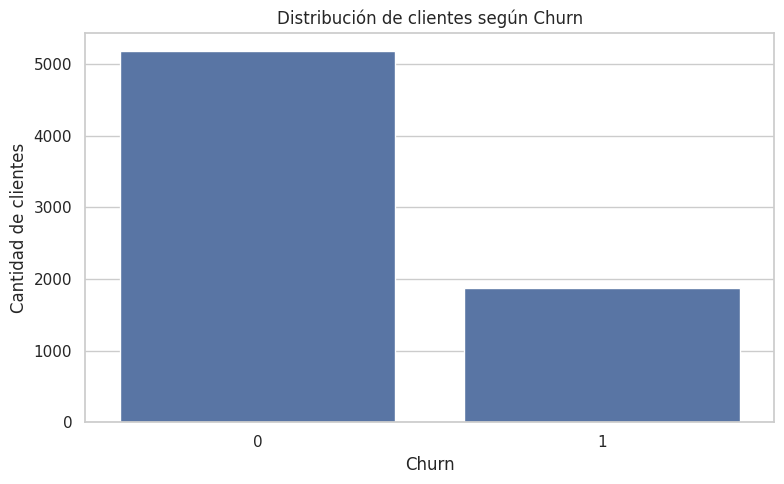

In [329]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Churn', data=df)
plt.title('Distribución de clientes según Churn')
plt.xlabel('Churn')
plt.ylabel('Cantidad de clientes')
plt.show()

/tmp/ipython-input-964517655.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Churn', data=df, palette='pastel')


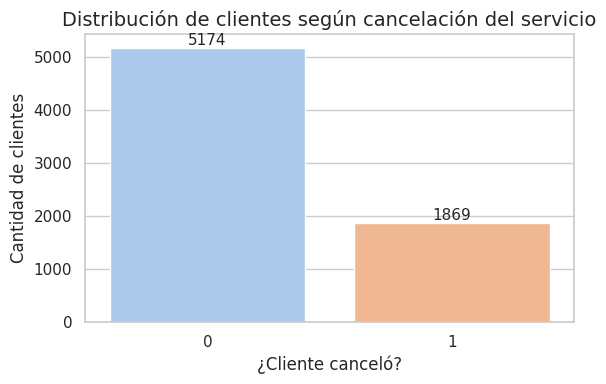

In [312]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid", palette="pastel")

plt.figure(figsize=(6, 4))
ax = sns.countplot(x='Churn', data=df, palette='pastel')

plt.title('Distribución de clientes según cancelación del servicio', fontsize=14)
plt.xlabel('¿Cliente canceló?', fontsize=12)
plt.ylabel('Cantidad de clientes', fontsize=12)

for p in ax.patches:
    height = int(p.get_height())
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom', fontsize=11)

plt.tight_layout()
plt.show()

/tmp/ipython-input-3946842302.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Churn', data=df_viz, palette='pastel')


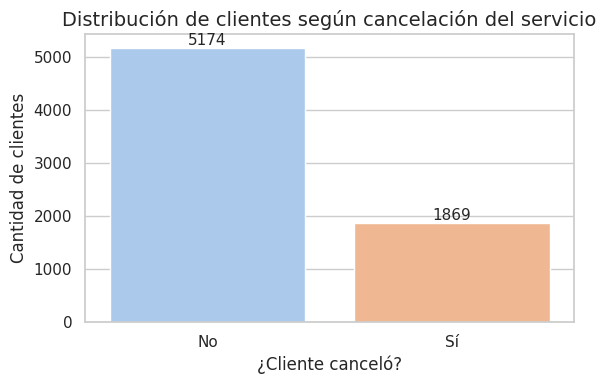

In [313]:
df_viz = df.copy()

df_viz['Churn'] = df_viz['Churn'].replace({0: 'No', 1: 'Sí'})

import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid", palette="pastel")

plt.figure(figsize=(6, 4))
ax = sns.countplot(x='Churn', data=df_viz, palette='pastel')

plt.title('Distribución de clientes según cancelación del servicio', fontsize=14)
plt.xlabel('¿Cliente canceló?', fontsize=12)
plt.ylabel('Cantidad de clientes', fontsize=12)

for p in ax.patches:
    height = int(p.get_height())
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom', fontsize=11)

plt.tight_layout()
plt.show()

# **Recuento de evasión por variables categóricas**

/tmp/ipython-input-2606019130.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=gender_churn, x='customer_gender', y='Churn', palette='pastel')


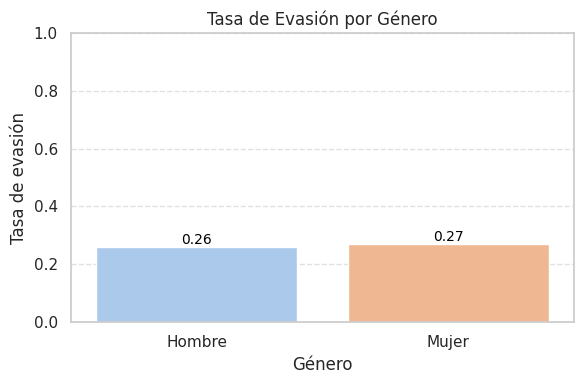

In [323]:
import matplotlib.pyplot as plt
import seaborn as sns

df_temp = df.copy()

df_temp['customer_gender'] = df_temp['customer_gender'].replace({'male': 'Hombre', 'female': 'Mujer'})

gender_churn = df_temp.groupby('customer_gender')['Churn'].mean().reset_index()

plt.figure(figsize=(6, 4))
ax = sns.barplot(data=gender_churn, x='customer_gender', y='Churn', palette='pastel')

plt.title('Tasa de Evasión por Género')
plt.xlabel('Género')
plt.ylabel('Tasa de evasión')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.6)

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2f}', xy=(p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom', fontsize=10, color='black')

plt.tight_layout()
plt.show()

/tmp/ipython-input-1637439159.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='customer_SeniorCitizen', y='Churn', estimator='mean', palette='pastel')


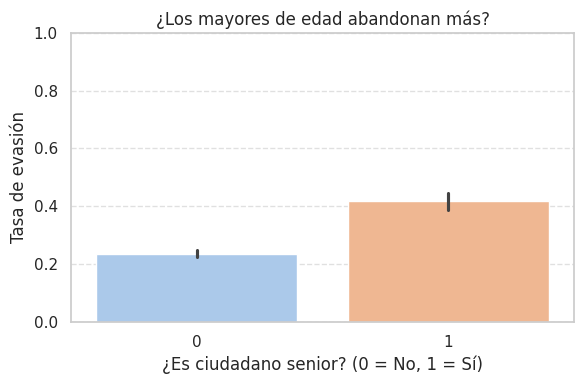

In [324]:
plt.figure(figsize=(6, 4))
sns.barplot(data=df, x='customer_SeniorCitizen', y='Churn', estimator='mean', palette='pastel')
plt.title('¿Los mayores de edad abandonan más?')
plt.xlabel('¿Es ciudadano senior? (0 = No, 1 = Sí)')
plt.ylabel('Tasa de evasión')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

/tmp/ipython-input-2260616455.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='account_Contract', y='Churn', estimator='mean', palette='pastel')


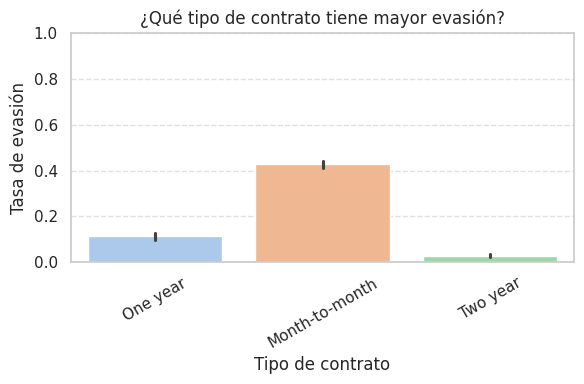

In [325]:
plt.figure(figsize=(6, 4))
sns.barplot(data=df, x='account_Contract', y='Churn', estimator='mean', palette='pastel')
plt.title('¿Qué tipo de contrato tiene mayor evasión?')
plt.xlabel('Tipo de contrato')
plt.ylabel('Tasa de evasión')
plt.xticks(rotation=30)
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

/tmp/ipython-input-2944091187.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='account_PaymentMethod', y='Churn', estimator='mean', palette='pastel')


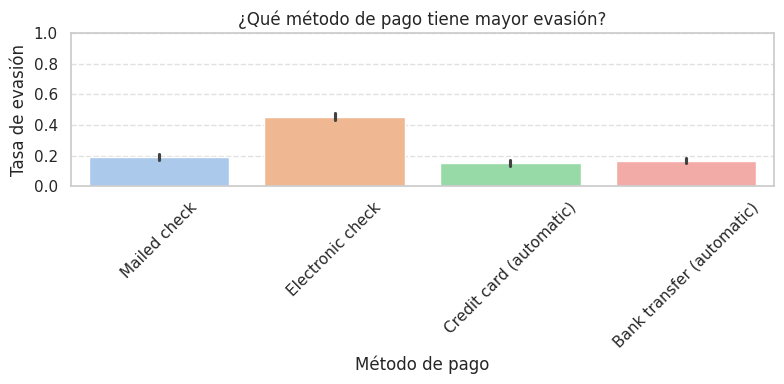

In [326]:
plt.figure(figsize=(8, 4))
sns.barplot(data=df, x='account_PaymentMethod', y='Churn', estimator='mean', palette='pastel')
plt.title('¿Qué método de pago tiene mayor evasión?')
plt.xlabel('Método de pago')
plt.ylabel('Tasa de evasión')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

/tmp/ipython-input-24400549.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='internet_TechSupport', y='Churn', estimator='mean', palette='pastel')


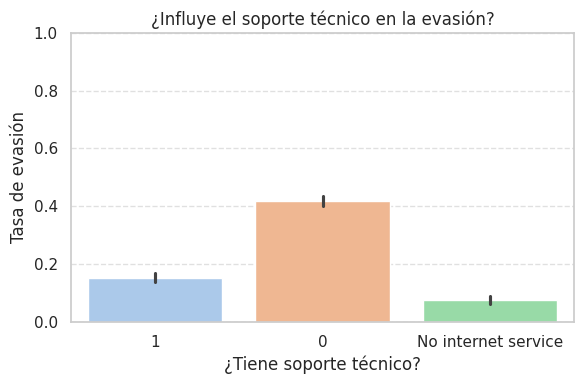

In [327]:
plt.figure(figsize=(6, 4))
sns.barplot(data=df, x='internet_TechSupport', y='Churn', estimator='mean', palette='pastel')
plt.title('¿Influye el soporte técnico en la evasión?')
plt.xlabel('¿Tiene soporte técnico?')
plt.ylabel('Tasa de evasión')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

# **Conteo de evasión por variables numéricas**

/tmp/ipython-input-1876419621.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Churn', y='customer_tenure', palette='pastel')


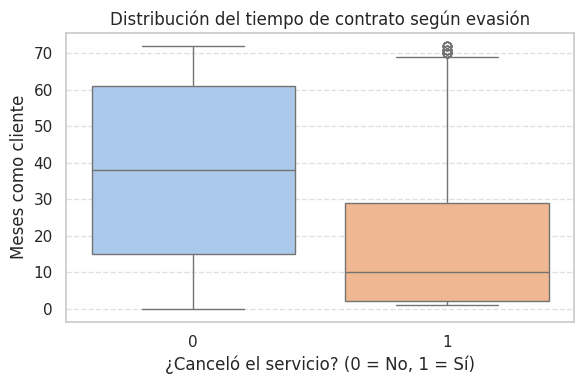

In [330]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x='Churn', y='customer_tenure', palette='pastel')

plt.title('Distribución del tiempo de contrato según evasión')
plt.xlabel('¿Canceló el servicio? (0 = No, 1 = Sí)')
plt.ylabel('Meses como cliente')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

/tmp/ipython-input-1456805935.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Churn', y='account_Charges_Total', palette='pastel')


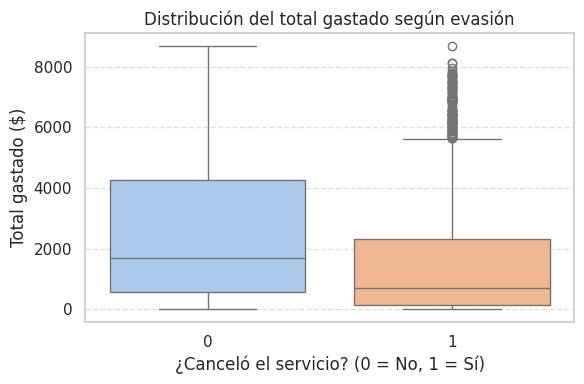

In [331]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x='Churn', y='account_Charges_Total', palette='pastel')

plt.title('Distribución del total gastado según evasión')
plt.xlabel('¿Canceló el servicio? (0 = No, 1 = Sí)')
plt.ylabel('Total gastado ($)')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Informe Final - Análisis de Evasión de Clientes (Churn) - TelecomX

## 🔹 Introducción

El presente análisis tiene como objetivo comprender los factores que contribuyen a la evasión de clientes (churn) en la empresa ficticia **TelecomX**, dedicada a ofrecer servicios de telefonía, internet y televisión. La retención de clientes es uno de los pilares del crecimiento sostenible de una empresa. Por ello, identificar patrones de comportamiento de los clientes que abandonan el servicio es crucial para diseñar estrategias efectivas de fidelización.

---

## 🔹 Limpieza y Tratamiento de Datos

Para garantizar la calidad de los análisis, se realizaron los siguientes pasos:

- 📁 Importación de datos desde el repositorio oficial del desafío.
- 🔍 Revisión de tipos de datos y nombres de columnas.
- 🧹 Estandarización de nombres de columnas para facilitar su uso en el código.
- 🔄 Conversión de la variable `Churn` a formato binario (`0` para clientes activos y `1` para clientes que abandonaron).
- 🧽 Eliminación de columnas irrelevantes o con datos inconsistentes si fue necesario.
- 💡 Conversión de columnas numéricas con formato de texto a tipo `float`, como `account_Charges_Total`.

---

## 🔹 Análisis Exploratorio de Datos (AED)

### ✅ Estadísticas descriptivas

Se usó `df.describe()` para comprender el rango, media, desviación estándar y valores extremos de las variables numéricas. Esto ayudó a identificar posibles outliers y entender el perfil promedio del cliente.

### ✅ Distribución de la variable objetivo `Churn`

Se realizó un gráfico de barras para visualizar cuántos clientes permanecieron (`No`) y cuántos se dieron de baja (`Sí`). Este gráfico reveló el desbalance de clases en los datos (más clientes permanecen que los que cancelan).

### ✅ Análisis de correlaciones y visualizaciones

- Se analizaron variables como:
  - **Tenencia del cliente (`customer_tenure`)**
  - **Tipo de contrato (`account_Contract`)**
  - **Servicios adicionales (seguridad, respaldo, soporte técnico)**
  - **Método de pago (`account_PaymentMethod`)**
- Se utilizaron gráficos de barras, histogramas y heatmaps para entender cómo estas variables se relacionan con el churn.

---

## 🔹 Conclusiones e Insights

📌 Entre los hallazgos más relevantes:

- Los clientes con contrato **mensual** presentaron una **tasa de evasión significativamente mayor** que aquellos con contratos anuales o por dos años.
- La mayoría de los clientes que abandonan **no cuentan con servicios adicionales** como respaldo en línea o soporte técnico.
- Los clientes con cargos mensuales más altos tienen una **mayor probabilidad de evasión**, especialmente si su permanencia es menor a un año.
- El método de pago también influye: clientes que pagan con tarjetas virtuales o medios electrónicos tienen una tasa de churn más elevada.

---

## 🔹 Recomendaciones

Con base en los análisis anteriores, se proponen las siguientes estrategias:

1. **Incentivar contratos a largo plazo** mediante descuentos o beneficios exclusivos.
2. **Promover la activación de servicios adicionales**, como soporte técnico y respaldo, destacando su valor en la experiencia del cliente.
3. **Revisar las tarifas mensuales** y ofrecer planes más flexibles para clientes con cargos elevados.
4. **Segmentar campañas de retención** enfocadas en clientes con menos de 6 meses de antigüedad.
5. **Optimizar métodos de pago** para hacerlos más amigables, seguros y confiables, promoviendo los que tienen mejor tasa de retención.

---


